In [25]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

wd = '/Users/ewenwang/Documents/practice_data/conversion_rate/'
file = ['round2_keras_train_7.txt', 'round2_keras_test_a.txt']
profile = 'round2_profile_user_a.txt'
page = 'round2_page_data_a.txt'

train = pd.read_csv(wd+file[0], sep=' ')
test = pd.read_csv(wd+file[1], sep=' ')
print('train shape: ', train.shape, '\ntest shape: ', test.shape)

data = pd.concat([train, test])

data = data.merge(pd.read_csv(wd+profile, sep='#', na_values=['\\N']), on='instance_id', how='left').merge(pd.read_csv(wd+page, sep=' '), on='instance_id', how='left')
print('data shape: ', data.shape)

train shape:  (1077175, 24) 
test shape:  (519888, 23)
data shape:  (1597063, 66)


In [26]:
import time

def timestamp_datetime(timestamp):
    return time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(timestamp))

data['realtime'] = data['context_timestamp'].apply(timestamp_datetime)
data['realtime'] = pd.to_datetime(data['realtime'])
data['hour'] = data['realtime'].dt.hour
data['minute'] = data['realtime'].dt.minute
data['minute_of_day'] = data['hour']*60+data['minute']

del data['realtime']
del data['context_timestamp']

In [27]:
train = data[data.is_trade.notnull()]
test = data[data.is_trade.isnull()]
print('train shape: ', train.shape, '\ntest shape: ', test.shape)

train shape:  (1077175, 68) 
test shape:  (519888, 68)


In [28]:
# import pandas_profiling as pp
# import matplotlib.pyplot as plt

# pp.ProfileReport(data)

Training LGBM model...
[100]	valid_0's binary_logloss: 0.294089
[200]	valid_0's binary_logloss: 0.20134
[300]	valid_0's binary_logloss: 0.177947
[400]	valid_0's binary_logloss: 0.171914
[500]	valid_0's binary_logloss: 0.170011
[600]	valid_0's binary_logloss: 0.169236
[700]	valid_0's binary_logloss: 0.168796
[800]	valid_0's binary_logloss: 0.168506
[900]	valid_0's binary_logloss: 0.168309
[1000]	valid_0's binary_logloss: 0.168167
[1100]	valid_0's binary_logloss: 0.168066
[1200]	valid_0's binary_logloss: 0.167986
[1300]	valid_0's binary_logloss: 0.167932
[1400]	valid_0's binary_logloss: 0.167877
[1500]	valid_0's binary_logloss: 0.167822
[1600]	valid_0's binary_logloss: 0.167779
[1700]	valid_0's binary_logloss: 0.167759
[1800]	valid_0's binary_logloss: 0.16774
[1900]	valid_0's binary_logloss: 0.167714
[2000]	valid_0's binary_logloss: 0.167691
[2100]	valid_0's binary_logloss: 0.167682
[2200]	valid_0's binary_logloss: 0.167657
[2300]	valid_0's binary_logloss: 0.16765
[2400]	valid_0's binary

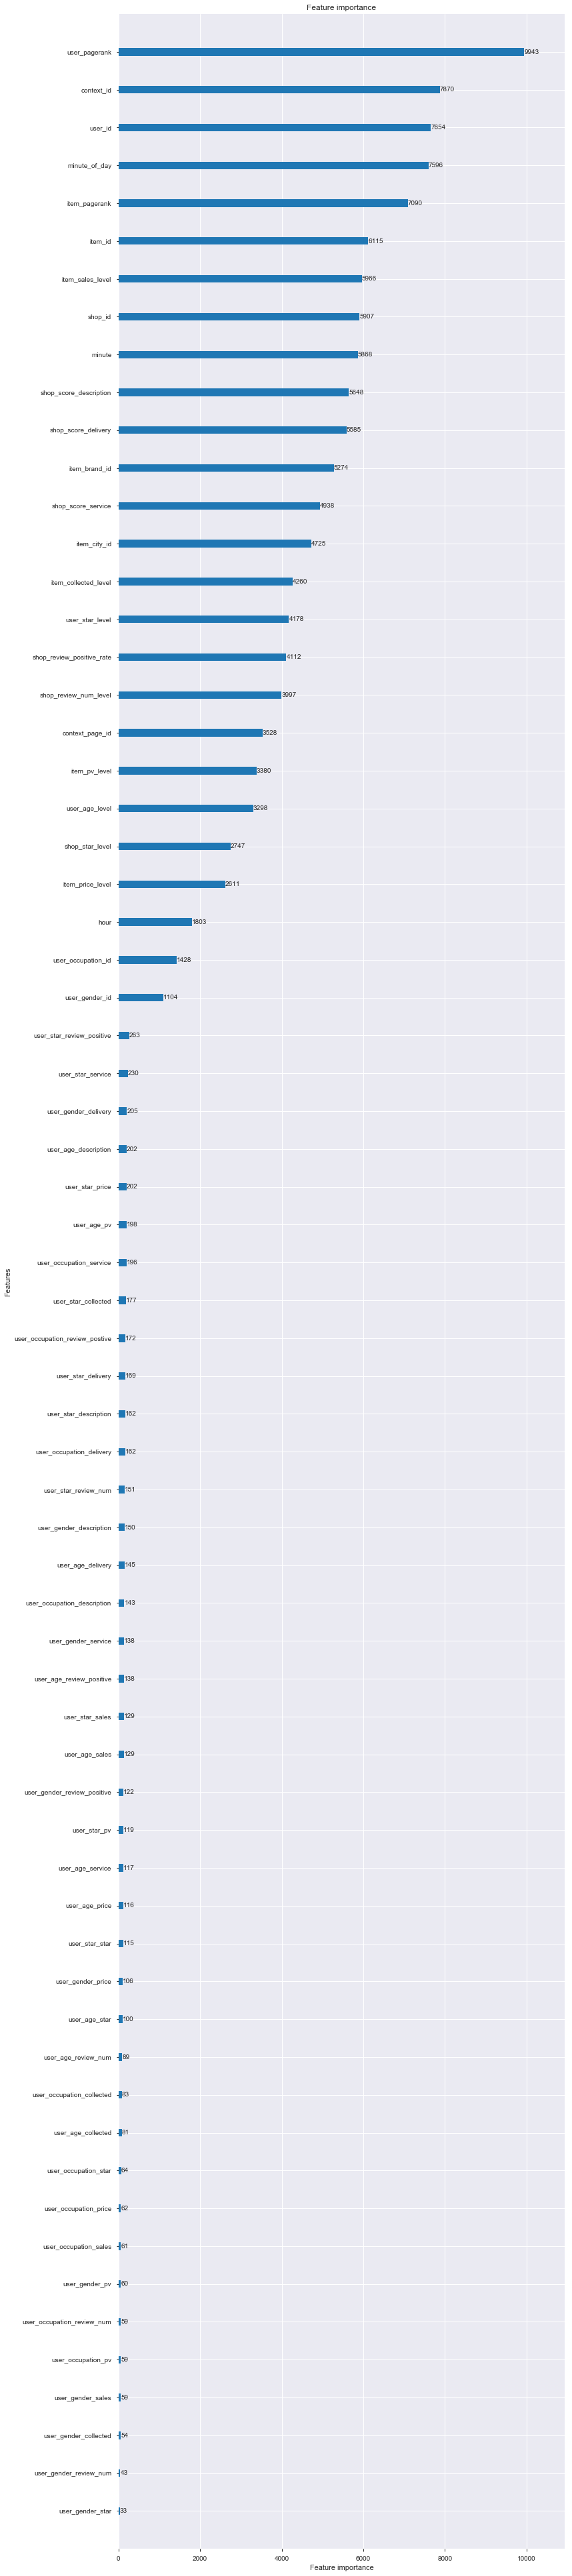

In [29]:
import Submission 
%matplotlib inline

drop_list = ['is_trade', 'instance_id']
model = Submission.Submission(train, test, drop_list, valid_hour=11)

In [32]:
profile = 'round2_profile_user_a.txt'

profile_d = pd.read_csv(wd+profile, sep='#', na_values=['\\N'])

In [30]:
profile = ['round2_profile_train_7.txt', 'round2_profile_test_a.txt']
train.to_csv(wd+profile[0], index=False, sep=' ')
test.to_csv(wd+profile[1], index=False, sep=' ')

SystemError: <built-in method item of numpy.ndarray object at 0x178161ad0> returned a result with an error set